In [1]:
import os
import re
import sklearn
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *

pd.set_option('display.max_columns', None)


In [2]:
districts_info = pd.read_csv('districts_info.csv')

In [3]:
districts_info.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
districts_info.tail()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN
232,7164,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [5]:
products_info = pd.read_csv('products_info.csv')

In [6]:
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [8]:
products_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [9]:
districts_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [37]:
engagement = 'C:/Users/FLUXNATURE/Documents/GitHub/Covid-19-Impact-on-Digital-Learning/engagement_data/'

#for filename in os.listdir(engagement):
    #print(filename)

In [38]:
engagement_1000 = pd.read_csv(engagement + '1000.csv')

In [40]:
engagement_1000.tail()

,time,lp_id,pct_access,engagement_index
103998,2020-12-31,68845.0,0.00,NaN
103999,2020-12-31,28324.0,0.00,NaN
104000,2020-12-31,64947.0,0.00,NaN
104001,2020-12-31,13496.0,0.03,0.26
104002,2020-12-31,79673.0,0.03,0.26


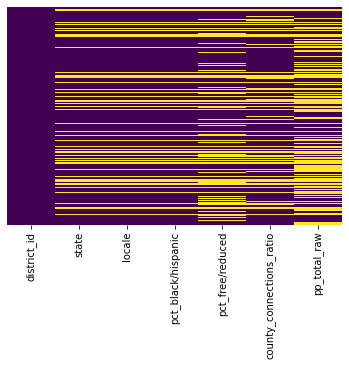

In [41]:
sns.heatmap(districts_info.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
districts_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


Drop NAN data
Since we cannot work with state with missing values, from the district data above we can only work with 176 states. 

In [43]:
districts_info = districts_info[districts_info.state.notna()].reset_index(drop = True)

In [45]:
districts_info.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
2,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
3,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
4,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["


In [50]:
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [59]:
sectors = products_info['Sector(s)']

In [60]:
sectors.tail(10)

362    PreK-12; Higher Ed; Corporate
363                          PreK-12
364                          PreK-12
365               PreK-12; Higher Ed
366                          PreK-12
367    PreK-12; Higher Ed; Corporate
368    PreK-12; Higher Ed; Corporate
369               PreK-12; Higher Ed
370                              NaN
371                              NaN
Name: Sector(s), dtype: object

In [65]:
class_sectors = products_info['Sector(s)'].str.get_dummies(sep="; ")
class_sectors.columns = [f"sector_{re.sub(' ', '', z)}" for z in class_sectors.columns]

In [68]:
products_info = products_info.join(class_sectors)
products_info.drop("Sector(s)", axis=1, inplace=True)

In [70]:
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,Primary Essential Function,sector_Corporate,sector_HigherEd,sector_PreK-12
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,LC - Digital Learning Platforms,0,0,1
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",LC - Digital Learning Platforms,0,0,1
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC","LC - Sites, Resources & Reference - Games & Si...",0,0,1
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,LC - Digital Learning Platforms,0,1,1
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,LC - Digital Learning Platforms,0,0,1


In [71]:
products_info['primary_function_main'] = products_info['Primary Essential Function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
products_info['primary_function_sub'] = products_info['Primary Essential Function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

# Synchronize similar values
products_info['primary_function_sub'] = products_info['primary_function_sub'].replace({'Sites, Resources & References' : 'Sites, Resources & Reference'})
products_info.drop("Primary Essential Function", axis=1, inplace=True)

In [72]:
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,sector_Corporate,sector_HigherEd,sector_PreK-12,primary_function_main,primary_function_sub
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,0,0,1,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",0,0,1,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",0,0,1,LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,0,1,1,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,0,0,1,LC,Digital Learning Platforms


In [74]:
engagement_Path = 'C:/Users/FLUXNATURE/Documents/GitHub/Covid-19-Impact-on-Digital-Learning/engagement_data'

In [85]:
engage_data = []

for district in districts_info.district_id.unique():
    df = pd.read_csv(f'{engagement_Path}/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    engage_data.append(df)
    
    
engagement_new = pd.concat(engage_data)
engagement_new = engagement_new.reset_index(drop=True)


In [88]:
engagement_new.head()

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-27,32213.0,100.00,3000.00,8815
1,2020-02-25,90153.0,33.33,2666.67,8815
2,2020-02-25,99916.0,0.00,NaN,8815
3,2020-02-25,28504.0,0.00,NaN,8815
4,2020-02-25,95731.0,33.33,333.33,8815
